# Importing modules

In [34]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 


## Load Dataset


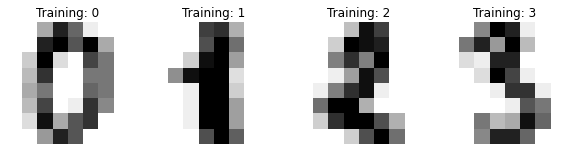

In [35]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

# Processing Data

In [36]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)


In [38]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

## Training the model

In [39]:
# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.9688542825361512


[ 0.  0.  1. 11. 14. 15.  3.  0.  0.  1. 13. 16. 12. 16.  8.  0.  0.  8.
 16.  4.  6. 16.  5.  0.  0.  5. 15. 11. 13. 14.  0.  0.  0.  0.  2. 12.
 16. 13.  0.  0.  0.  0.  0. 13. 16. 16.  6.  0.  0.  0.  0. 16. 16. 16.
  7.  0.  0.  0.  0. 11. 13. 12.  1.  0.]
8
[ 0.  0.  6. 14. 16.  5.  0.  0.  0.  2. 16. 16. 16.  7.  0.  0.  0.  2.
 15. 16. 15.  2.  0.  0.  0.  0.  6. 16. 15.  7.  0.  0.  0.  0. 14. 10.
  6. 16.  3.  0.  0.  1. 16.  3.  0. 16.  7.  0.  0.  0. 10. 11. 11. 15.
  3.  0.  0.  0.  3. 14. 16.  6.  0.  0.]
8
[ 0.  0.  0.  4. 15.  6.  0.  0.  0.  0.  0. 13. 13.  1.  0.  0.  0.  0.
  7. 16.  2.  0.  0.  0.  0.  4. 15.  8.  0.  5.  0.  0.  0. 11. 14.  1.
  6. 16.  5.  0.  1. 16. 14. 12. 16. 16.  3.  0.  0. 10. 12. 10. 16. 10.
  0.  0.  0.  0.  0.  6. 16.  2.  0.  0.]
4
[ 0.  0.  1.  9. 15. 11.  3.  0.  0.  0. 12.  9.  1. 11.  6.  0.  0.  0.
 13.  7.  6. 16.  8.  0.  0.  0.  4. 10. 12. 15.  4.  0.  0.  0.  0.  0.
  0. 12.  6.  0.  0.  8.  7.  0.  0. 15.  5.  0.  0.  1. 12. 10. 

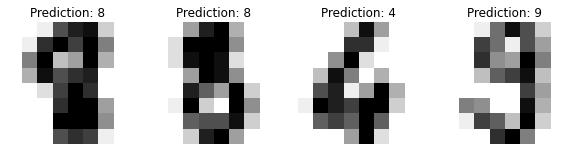

In [53]:
#Plotting some predictions to visualize how the model works
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    print(image)
    print(prediction)
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

## Finding a great regularization using cross validation

In [41]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid_search = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................

In [42]:
print(grid_search.best_estimator_)
grid_predictions = grid_search.predict(X_test)

SVC(C=0.1, gamma=1, kernel='poly')


## CV Results

In [43]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        88
           1       0.99      0.92      0.95        91
           2       1.00      0.97      0.98        86
           3       0.94      0.89      0.92        91
           4       0.99      0.96      0.97        92
           5       0.93      0.97      0.95        91
           6       0.98      0.99      0.98        91
           7       0.97      0.98      0.97        89
           8       0.91      0.97      0.94        88
           9       0.88      0.95      0.91        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899



The model already started with a good accurcy, but it didn't raised up with great parameters, may the fact the wrongly predicted data could have some kind of alteration in the image. Plotting the wrongly predicted values could help us understand more why we couldn't get a better result.

# Plotting the wrong predicted values

In [104]:
wrong = []
wrong_x = []
for input, prediction, label in zip(X_test, grid_predictions, y_test):
    if prediction != label:
        wrong_x.append(input)
        wrong.append(prediction)
        print('has been classified as ', prediction, 'and should be ', label) 

has been classified as  9 and should be  5
has been classified as  9 and should be  5
has been classified as  5 and should be  7
has been classified as  9 and should be  4
has been classified as  8 and should be  7
has been classified as  7 and should be  3
has been classified as  9 and should be  3
has been classified as  3 and should be  8
has been classified as  8 and should be  1
has been classified as  5 and should be  8
has been classified as  8 and should be  1
has been classified as  9 and should be  1
has been classified as  3 and should be  2
has been classified as  6 and should be  5
has been classified as  3 and should be  2
has been classified as  9 and should be  1
has been classified as  9 and should be  1
has been classified as  9 and should be  1
has been classified as  9 and should be  1
has been classified as  3 and should be  9
has been classified as  7 and should be  8
has been classified as  1 and should be  6
has been classified as  7 and should be  9
has been cl

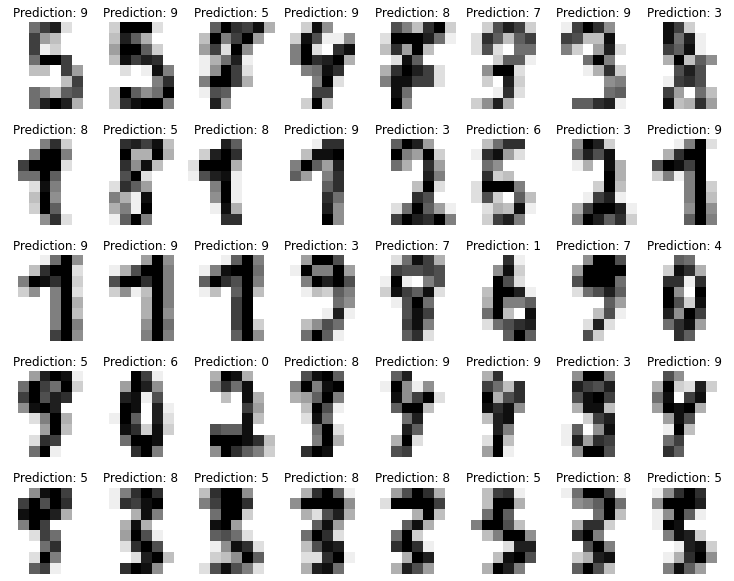

In [102]:
fig = plt.figure(figsize=(10, 8))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i, image, prediction in zip(range(40), wrong_x, wrong):
    ax = fig.add_subplot(5, 8, i + 1, xticks=[], yticks=[])
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.set_title(f"Prediction: {prediction}")
    
plt.show()